## Dog vs Cat breeds

**Disclamer** :

If you want to run this code you will need the [Fastai library](https://www.fast.ai/).

The data set used is [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/).

The app will be hosted on [Render](https://course.fast.ai/deployment_render.html)

**Goals** :

1. Add more dog breeds to the Oxford dataset
2. Train the model using resnet-50 arch.
2. Host an app for this model using render.


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

## Modifying the dataset

If you have finished fastai course lesson 1 you know we used the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds.

Copy paste that data in this directory/folder.

Check if it's in the same directory by running the code below.

In [3]:
path = Path()
path.ls() 

[WindowsPath('.ipynb_checkpoints'),
 WindowsPath('models'),
 WindowsPath('oxford-iiit-pet'),
 WindowsPath('Petbreeds.ipynb')]

In [4]:
path = path/'oxford-iiit-pet'
path_img = path/'images'
path.ls()

[WindowsPath('oxford-iiit-pet/annotations'),
 WindowsPath('oxford-iiit-pet/dalmatian'),
 WindowsPath('oxford-iiit-pet/doberman'),
 WindowsPath('oxford-iiit-pet/german_shepherd'),
 WindowsPath('oxford-iiit-pet/golden_retriever'),
 WindowsPath('oxford-iiit-pet/husky'),
 WindowsPath('oxford-iiit-pet/images'),
 WindowsPath('oxford-iiit-pet/labrador_retriever'),
 WindowsPath('oxford-iiit-pet/rottweiler'),
 WindowsPath('oxford-iiit-pet/urls')]

## Adding extra data

Adding dog breeds to the data set.

Skip this part if you already got the data.

In [5]:
folder = ['labrador_retriever','golden_retriever','german_shepherd','doberman','rottweiler','husky','dalmatian','urls']

In [6]:
for folder_name in folder:
    dest = path/folder_name
    dest.mkdir(parents=True, exist_ok=True)
path.ls()

[WindowsPath('oxford-iiit-pet/annotations'),
 WindowsPath('oxford-iiit-pet/dalmatian'),
 WindowsPath('oxford-iiit-pet/doberman'),
 WindowsPath('oxford-iiit-pet/german_shepherd'),
 WindowsPath('oxford-iiit-pet/golden_retriever'),
 WindowsPath('oxford-iiit-pet/husky'),
 WindowsPath('oxford-iiit-pet/images'),
 WindowsPath('oxford-iiit-pet/labrador_retriever'),
 WindowsPath('oxford-iiit-pet/rottweiler'),
 WindowsPath('oxford-iiit-pet/urls')]

## Get a list of URLs

**Reference** fastai course [lesson2](https://course.fast.ai/videos/?lesson=2)

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Save all the `urls` you saved in the folder named `urls`.

Once you got all the urls of the breeds , run the code below to download the images.

In [7]:
folder.pop(7) #removing urls folder
urls = path/'urls'
urls.ls()

[WindowsPath('oxford-iiit-pet/urls/urls_dalmatian.csv'),
 WindowsPath('oxford-iiit-pet/urls/urls_doberman.csv'),
 WindowsPath('oxford-iiit-pet/urls/urls_german_shepherd.csv'),
 WindowsPath('oxford-iiit-pet/urls/urls_golden_retriever.csv'),
 WindowsPath('oxford-iiit-pet/urls/urls_husky.csv'),
 WindowsPath('oxford-iiit-pet/urls/urls_labrador_retriever.csv'),
 WindowsPath('oxford-iiit-pet/urls/urls_rottweiler.csv')]

## Downloading the data

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

In [8]:
for folder_name in folder:
    file_name = 'urls_'+folder_name+'.csv'
    dest = path/folder_name
    download_images(urls/file_name, dest, max_pics=230)

## Cleaning the data

To check if there are any broken images/links. Since the dataset has around 200 images for each breed , I deleted some hand picked images and made it 200 (There might be drawing,animated pics with your download).

In [9]:
for folder_name in folder:
    print(folder_name)
    verify_images(path/folder_name, delete=True, max_size=500)

labrador_retriever


golden_retriever


german_shepherd


doberman


rottweiler


husky


dalmatian


## Renaming the downloaded pics

To blend the downloaded data with already existing oxford data , we need to label the data like they do.

`Os` and `shutil` are inbuilt python libraries , no need to download them externally

In [10]:
import os

In [11]:
for folder_name in folder:
    i = 1
    for file_name in os.listdir(path/folder_name):
        new_name = folder_name + '_' + str(i) + '.jpg'
        source = path/folder_name/file_name
        dest = path/folder_name/new_name
        os.rename(source,dest)
        i+=1
        

## Move files into the old dataset

Since the previous data set had all the images in one folder , We need to move the downloaded images in that folder

In [12]:
import shutil

In [13]:
for folder_name in folder:
    for file_name in os.listdir(path/folder_name):
        source = path/folder_name/file_name
        dest = path/'images'/file_name
        shutil.move(source,dest)

## List of the breeds we are working on

Continue from here after skipping

In [5]:
classes = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier','labrador_retriever','golden_retriever','german_shepherd','doberman','rottweiler','husky','dalmatian']

In [6]:
classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier',
 'labrador_retriever',
 'golden_retriever',
 'german_shepherd',
 'doberman',
 'rottweiler',
 'husky',
 'dalmatian']

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[WindowsPath('oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('oxford-iiit-pet/images/Abyssinian_101.jpg'),
 WindowsPath('oxford-iiit-pet/images/Abyssinian_102.jpg')]

In [8]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [9]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=150, bs=8
                                  ).normalize(imagenet_stats)

F:\Anaconda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
F:\Anaconda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpo

F:\Anaconda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
F:\Anaconda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpo

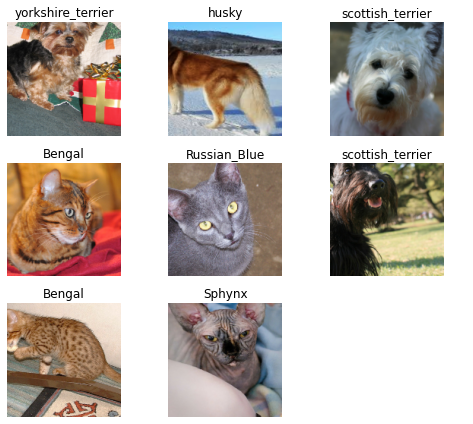

In [10]:
data.show_batch(rows=3, figsize=(7,6))

In [11]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'dalmatian', 'doberman', 'english_cocker_spaniel', 'english_setter', 'german_shepherd', 'german_shorthaired', 'golden_retriever', 'great_pyrenees', 'havanese', 'husky', 'japanese_chin', 'keeshond', 'labrador_retriever', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'rottweiler', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(44, 44)

## Training the model

We are ready to train our model now . Let's use the resnet-50 architecutre


In [12]:
arch = models.resnet50

In [13]:
learn = cnn_learner(data, arch, metrics=error_rate)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


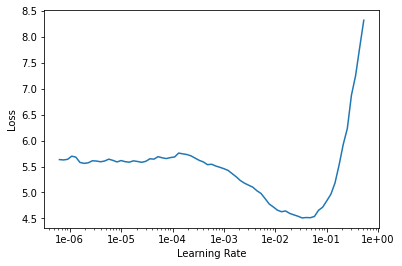

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
lr = 0.01

In [16]:
learn.fit_one_cycle(8, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.524694,0.731337,0.187820,09:50
1,1.589099,0.838214,0.207740,11:16
2,1.280365,0.568053,0.157086,10:12
3,1.117347,0.471011,0.141150,08:59
4,0.896420,0.576713,0.120091,08:49
5,0.679182,0.362381,0.110415,08:53
6,0.578949,0.367829,0.091064,09:08
7,0.496804,0.685976,0.102447,09:29


In [17]:
learn.save('stage-1-200-resnet_50')

## Interpretation

In [18]:
learn.load('stage-1-200-resnet_50');

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

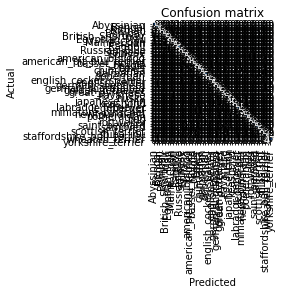

In [20]:
interp.plot_confusion_matrix()

In [21]:
interp.most_confused(min_val=2)

[('dalmatian', 'shiba_inu', 14),
 ('Ragdoll', 'Birman', 8),
 ('chihuahua', 'miniature_pinscher', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('boxer', 'american_bulldog', 5),
 ('dalmatian', 'Siamese', 5),
 ('beagle', 'basset_hound', 4),
 ('english_setter', 'english_cocker_spaniel', 4),
 ('Birman', 'Ragdoll', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Egyptian_Mau', 'Siamese', 3),
 ('Persian', 'Maine_Coon', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('basset_hound', 'beagle', 3),
 ('doberman', 'rottweiler', 3),
 ('english_setter', 'german_shorthaired', 3),
 ('golden_retriever', 'labrador_retriever', 3),
 ('labrador_retriever', 'golden_retriever', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Persian', 'doberman', 2),
 ('Ragdoll', 'Siamese', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('dob

## Unfreezing, fine-tuning, and learning rates

In [22]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


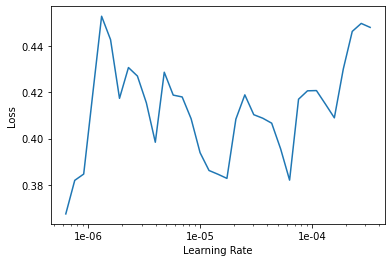

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(5, max_lr=slice(3e-6,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.506113,0.341450,0.093910,15:32
1,0.564974,0.604832,0.101309,16:35
2,0.436637,0.289562,0.088788,17:46
3,0.365592,0.326717,0.091633,16:58
4,0.302596,0.281589,0.087080,15:59


In [25]:
learn.save('stage-2-200-resnet_50')

## Interpretation

In [26]:
learn.load('stage-1-200-resnet_50');

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

In [28]:
interp.most_confused(min_val=2)

[('dalmatian', 'shiba_inu', 14),
 ('Ragdoll', 'Birman', 8),
 ('chihuahua', 'miniature_pinscher', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('boxer', 'american_bulldog', 5),
 ('dalmatian', 'Siamese', 5),
 ('beagle', 'basset_hound', 4),
 ('english_setter', 'english_cocker_spaniel', 4),
 ('Birman', 'Ragdoll', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Egyptian_Mau', 'Siamese', 3),
 ('Persian', 'Maine_Coon', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('basset_hound', 'beagle', 3),
 ('doberman', 'rottweiler', 3),
 ('english_setter', 'german_shorthaired', 3),
 ('golden_retriever', 'labrador_retriever', 3),
 ('labrador_retriever', 'golden_retriever', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Persian', 'doberman', 2),
 ('Ragdoll', 'Siamese', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('dob

## Saving the model

In [29]:
learn.export()

## Predicting on single images

In [30]:
learn = load_learner(path_img) #My export file is saving in path_img

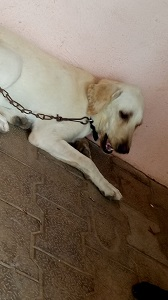

In [39]:
img = open_image('F:\\learningpython\\fastai\\datasets\\test_images\\dog4.jpg')
img

In [40]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'labrador_retriever'